# Import Libraries

In [210]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

# Loading dataset

In [211]:
df = pd.read_csv("forestfires.csv")

In [212]:
df1 = df.copy()

In [213]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [214]:
df1.drop(["month","day"],axis=1,inplace = True)

In [215]:
df1["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [216]:
df1.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [245]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


# Visualizations

<AxesSubplot:>

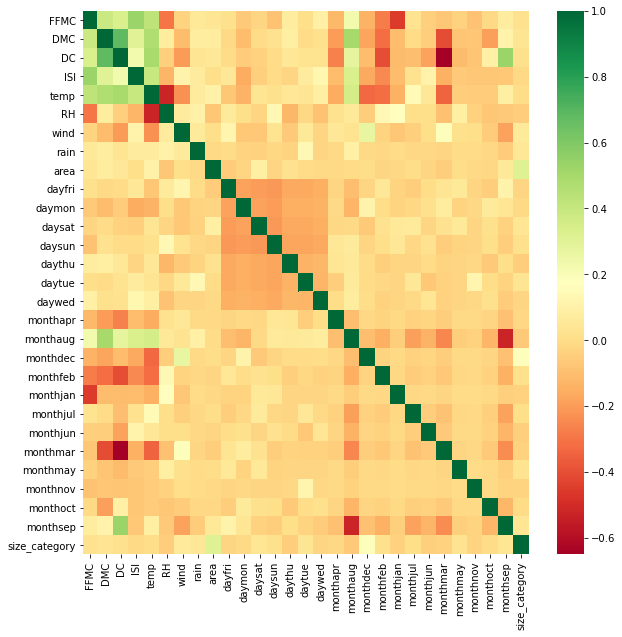

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),cmap="RdYlGn")

(array([  1.,   0.,   0.,   0.,   2.,   2.,   2.,   5.,  68., 437.]),
 array([18.7 , 26.45, 34.2 , 41.95, 49.7 , 57.45, 65.2 , 72.95, 80.7 ,
        88.45, 96.2 ]),
 <BarContainer object of 10 artists>)

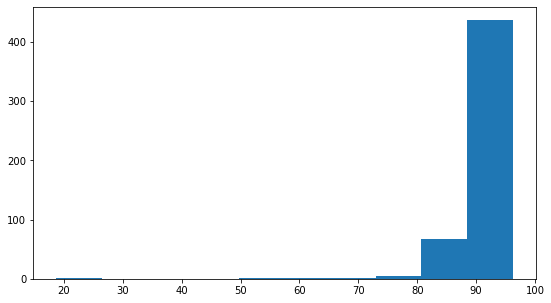

In [249]:
# Graphical Representation of data
#import matplotlib.pyplot as plt
# Histogram
import matplotlib.pyplot as plt
plt.hist(df1['FFMC'])

(array([ 63.,  63.,  49., 114., 113.,  42.,  25.,  23.,   9.,  16.]),
 array([  1.1 ,  30.12,  59.14,  88.16, 117.18, 146.2 , 175.22, 204.24,
        233.26, 262.28, 291.3 ]),
 <BarContainer object of 10 artists>)

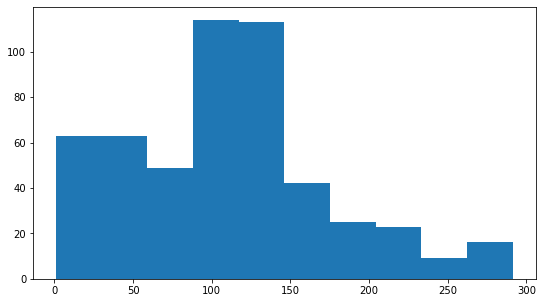

In [250]:
plt.hist(df1['DMC'])

(array([ 67.,  21.,   6.,  10.,  25.,  22.,  40., 136., 151.,  39.]),
 array([  7.9 ,  93.17, 178.44, 263.71, 348.98, 434.25, 519.52, 604.79,
        690.06, 775.33, 860.6 ]),
 <BarContainer object of 10 artists>)

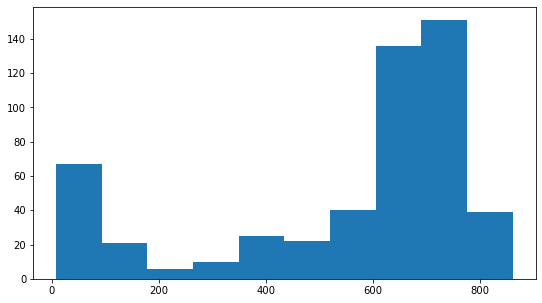

In [251]:
plt.hist(df1['DC'])

### Outlier Check

E:\Annoconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


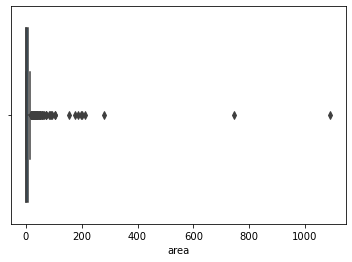

In [218]:
ax = sns.boxplot(df1['area'])

### There are 3 Outlier instances in our data

In [219]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


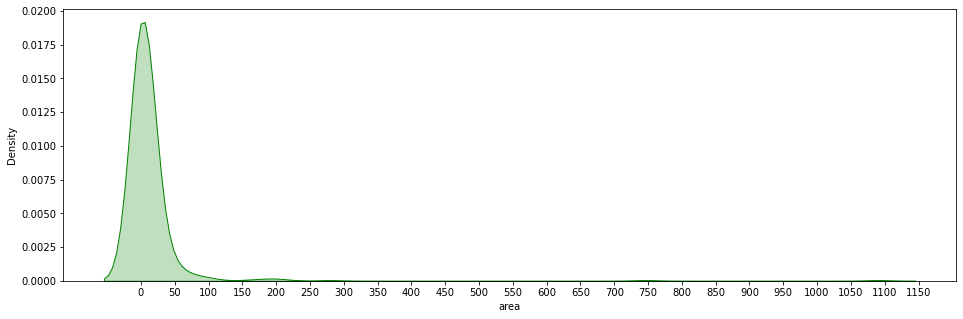

In [220]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['area'].skew()))
print("Kurtosis: {}".format(df1['area'].kurtosis()))
ax = sns.kdeplot(df1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

The Data is highly skewed and has large kurtosis value and
Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

In [221]:
dfa = df1[df1.columns[0:10]]
month_colum = dfa.select_dtypes(include='object').columns.tolist()

In [222]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

<Figure size 1152x720 with 0 Axes>

Majority of the fire accors in the month Aug and Sep. 
For Days Sun and Fri have recoreded the most cases

In [223]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

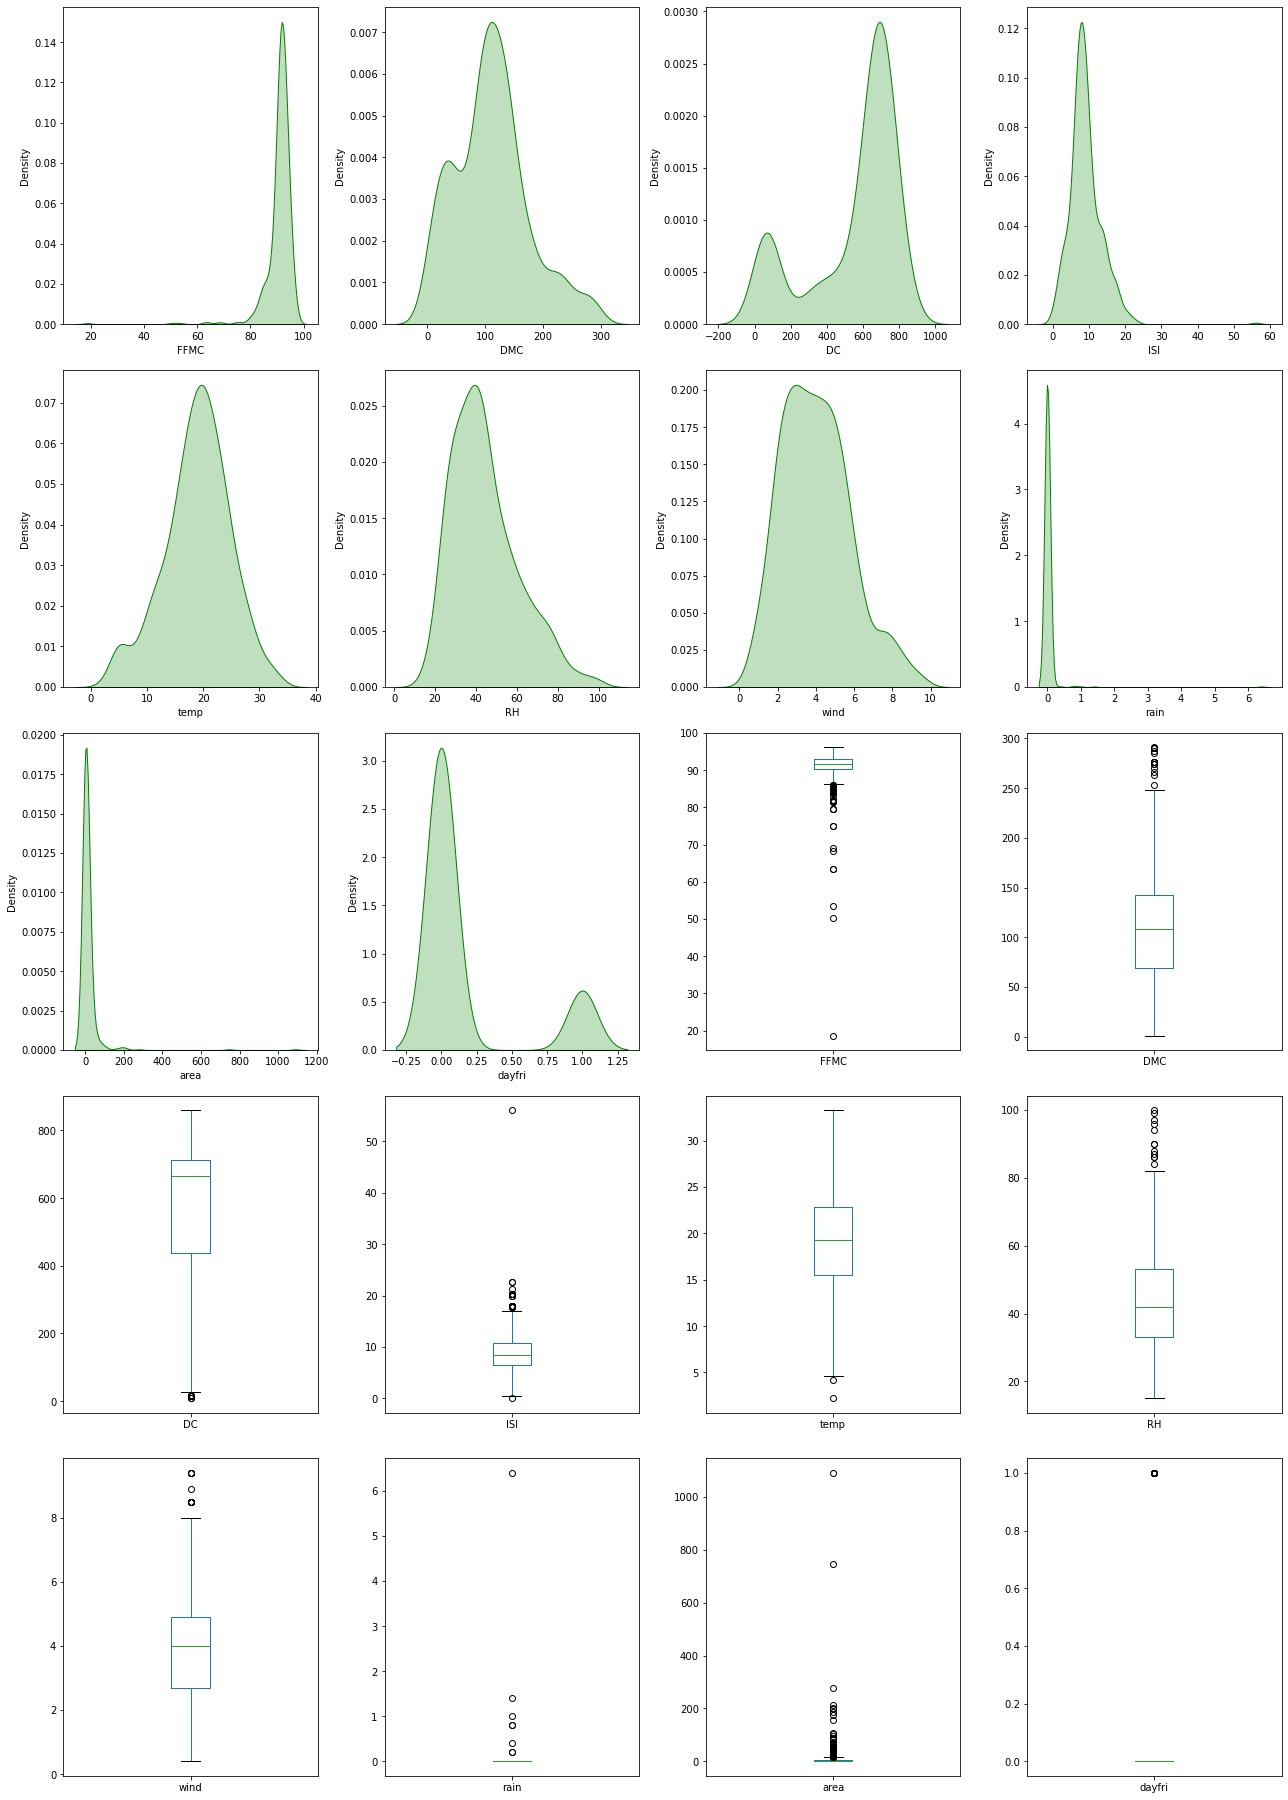

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265


In [224]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

# Finding Correlation

In [225]:
corr = df1[df1.columns[0:11]].corr()

<AxesSubplot:>

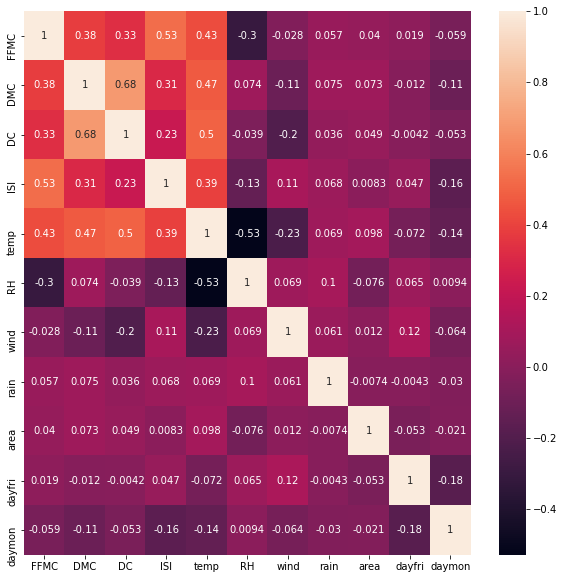

In [226]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## 3 - Neural Network Model

In [227]:
mapping = {'small': 1, 'large': 2}

In [228]:
df1 = df1.replace(mapping)

In [229]:
X = np.array(df1.iloc[:,0:28])
y = np.array(df1.iloc[:,28])

In [230]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [231]:
X_norm = norm_func(X)

In [232]:
x_train,x_test,y_train,y_test= train_test_split(X_norm,y, test_size=0.2,stratify = y)

In [233]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [234]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [235]:
model.fit(x_train, y_train, epochs=150, batch_size=10) 

Epoch 1/150
42/42 [==============================] - 0s 3ms/step - loss: 0.5099 - accuracy: 0.7312
Epoch 2/150
42/42 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.7312
Epoch 3/150
42/42 [==============================] - 0s 975us/step - loss: -0.2405 - accuracy: 0.7312
Epoch 4/150
42/42 [==============================] - 0s 1ms/step - loss: -0.7674 - accuracy: 0.7312
Epoch 5/150
42/42 [==============================] - 0s 1ms/step - loss: -1.4016 - accuracy: 0.7312
Epoch 6/150
42/42 [==============================] - 0s 1ms/step - loss: -2.1988 - accuracy: 0.7312
Epoch 7/150
42/42 [==============================] - 0s 975us/step - loss: -3.3434 - accuracy: 0.7312
Epoch 8/150
42/42 [==============================] - 0s 1ms/step - loss: -4.8172 - accuracy: 0.7312
Epoch 9/150
42/42 [==============================] - 0s 1ms/step - loss: -6.7637 - accuracy: 0.7312
Epoch 10/150
42/42 [==============================] - 0s 1ms/step - loss: -9.2145 - accuracy: 0.73

In [239]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 1ms/step - loss: -15185.9492 - accuracy: 0.7312
Accuracy: 73.12


# 4 - Conclusion

In [258]:
predictions = model.predict(x_train)

In [259]:
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[86.2, 26.2, 94.3, 5.1, 8.2, 51.0, 6.7, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[90.6, 35.4, 669.1, 6.7, 18.0, 33.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[90.6, 43.7, 686.9, 6.7, 14.6, 33.0, 1.3, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[91.7, 33.3, 77.5, 9.0, 8.3, 97.0, 4.0, 0.2, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[89.3, 51.3, 102.2, 9.6, 11.4, 99.0, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)


(array([[413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [216., 164.,  33.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 69.,   3.,  13.,  21.,  21.,  71., 177.,  38.,   0.,   0.],
        [413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [405.,   5.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.],
        [413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [413.,   0.,

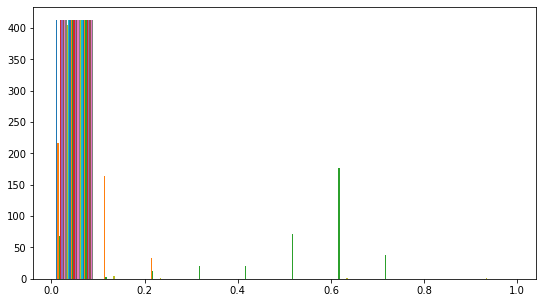

In [261]:
plt.hist(x_train)